# Medical Image Preprocessing for AI Applications

In this notebook, we'll explore essential preprocessing techniques for medical imaging.

Let's get started! 🏥🔬

Data shape: (274, 384, 384)
Data type: float64
Original value range: [0.00, 143.00]
Normalized value range: [0.00, 1.00]


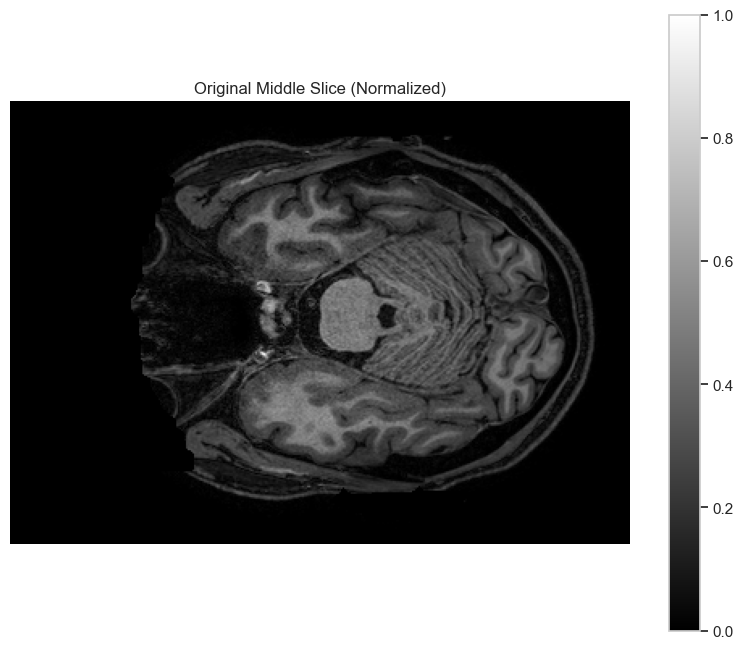

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from scipy import ndimage
from skimage import exposure, filters, restoration
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Load our example DICOM data
data_path = Path("../data/example-dicom-structural/structural.nii.gz")
img = nib.load(str(data_path))
data = img.get_fdata()

# Select a middle slice for visualization
middle_slice_idx = data.shape[2] // 2
slice_data = data[:, :, middle_slice_idx]

# Normalize to [0, 1] range for initial visualization
slice_data_norm = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min())

print(f"Data shape: {data.shape}")
print(f"Data type: {data.dtype}")
print(f"Original value range: [{slice_data.min():.2f}, {slice_data.max():.2f}]")
print(f"Normalized value range: [{slice_data_norm.min():.2f}, {slice_data_norm.max():.2f}]")

# Display the original slice
plt.figure(figsize=(10, 8))
plt.imshow(slice_data_norm, cmap='gray')
plt.colorbar()
plt.title('Original Middle Slice (Normalized)')
plt.axis('off')
plt.show()

## 1. Intensity Normalization

Intensity normalization is crucial for medical image preprocessing because:
- Different scanners produce different intensity ranges
- The same tissue type should have similar intensity values across images
- AI models perform better with standardized input ranges

Let's explore different normalization techniques:

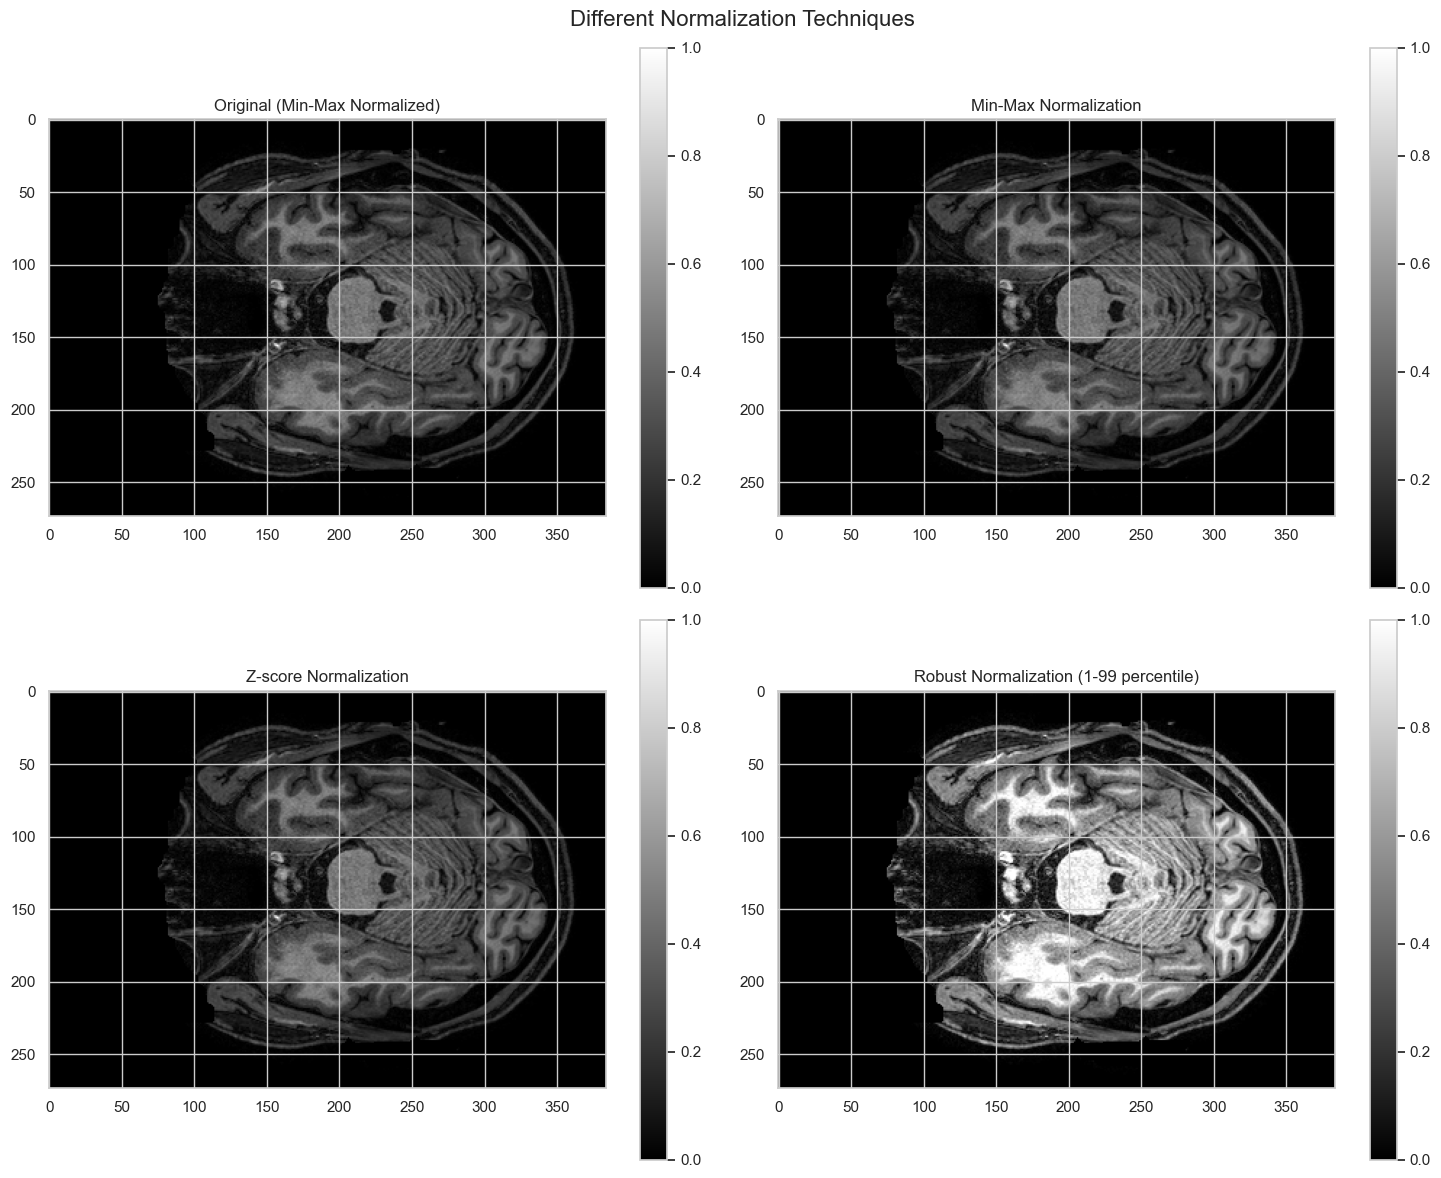

Statistics for different normalization methods:

Original (Normalized):
Range: [0.00, 1.00]
Mean: 0.10
Std: 0.14

Z-score Normalized:
Range: [0.00, 1.00]
Mean: 0.10
Std: 0.14

Robust Normalized:
Range: [0.00, 1.00]
Mean: 0.21
Std: 0.28


In [2]:
# 1. Min-Max Normalization
normalized_minmax = slice_data_norm.copy()

# 2. Z-score Normalization
normalized_zscore = (slice_data - slice_data.mean()) / slice_data.std()
normalized_zscore = (normalized_zscore - normalized_zscore.min()) / (normalized_zscore.max() - normalized_zscore.min())

# 3. Percentile-based Normalization (robust to outliers)
p1, p99 = np.percentile(slice_data, (1, 99))
normalized_robust = np.clip(slice_data, p1, p99)
normalized_robust = (normalized_robust - normalized_robust.min()) / (normalized_robust.max() - normalized_robust.min())

# Visualize the results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Different Normalization Techniques', fontsize=16)

# Original
im1 = axes[0, 0].imshow(slice_data_norm, cmap='gray')
axes[0, 0].set_title('Original (Min-Max Normalized)')
plt.colorbar(im1, ax=axes[0, 0])

# Min-Max
im2 = axes[0, 1].imshow(normalized_minmax, cmap='gray')
axes[0, 1].set_title('Min-Max Normalization')
plt.colorbar(im2, ax=axes[0, 1])

# Z-score
im3 = axes[1, 0].imshow(normalized_zscore, cmap='gray')
axes[1, 0].set_title('Z-score Normalization')
plt.colorbar(im3, ax=axes[1, 0])

# Robust
im4 = axes[1, 1].imshow(normalized_robust, cmap='gray')
axes[1, 1].set_title('Robust Normalization (1-99 percentile)')
plt.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Print statistics
print("Statistics for different normalization methods:")
print("\nOriginal (Normalized):")
print(f"Range: [{slice_data_norm.min():.2f}, {slice_data_norm.max():.2f}]")
print(f"Mean: {slice_data_norm.mean():.2f}")
print(f"Std: {slice_data_norm.std():.2f}")

print("\nZ-score Normalized:")
print(f"Range: [{normalized_zscore.min():.2f}, {normalized_zscore.max():.2f}]")
print(f"Mean: {normalized_zscore.mean():.2f}")
print(f"Std: {normalized_zscore.std():.2f}")

print("\nRobust Normalized:")
print(f"Range: [{normalized_robust.min():.2f}, {normalized_robust.max():.2f}]")
print(f"Mean: {normalized_robust.mean():.2f}")
print(f"Std: {normalized_robust.std():.2f}")

## 2. Noise Reduction

Medical images often contain various types of noise:
- Random noise from the imaging equipment
- Structured noise from the scanning process
- Motion artifacts from patient movement

Let's explore different denoising techniques:

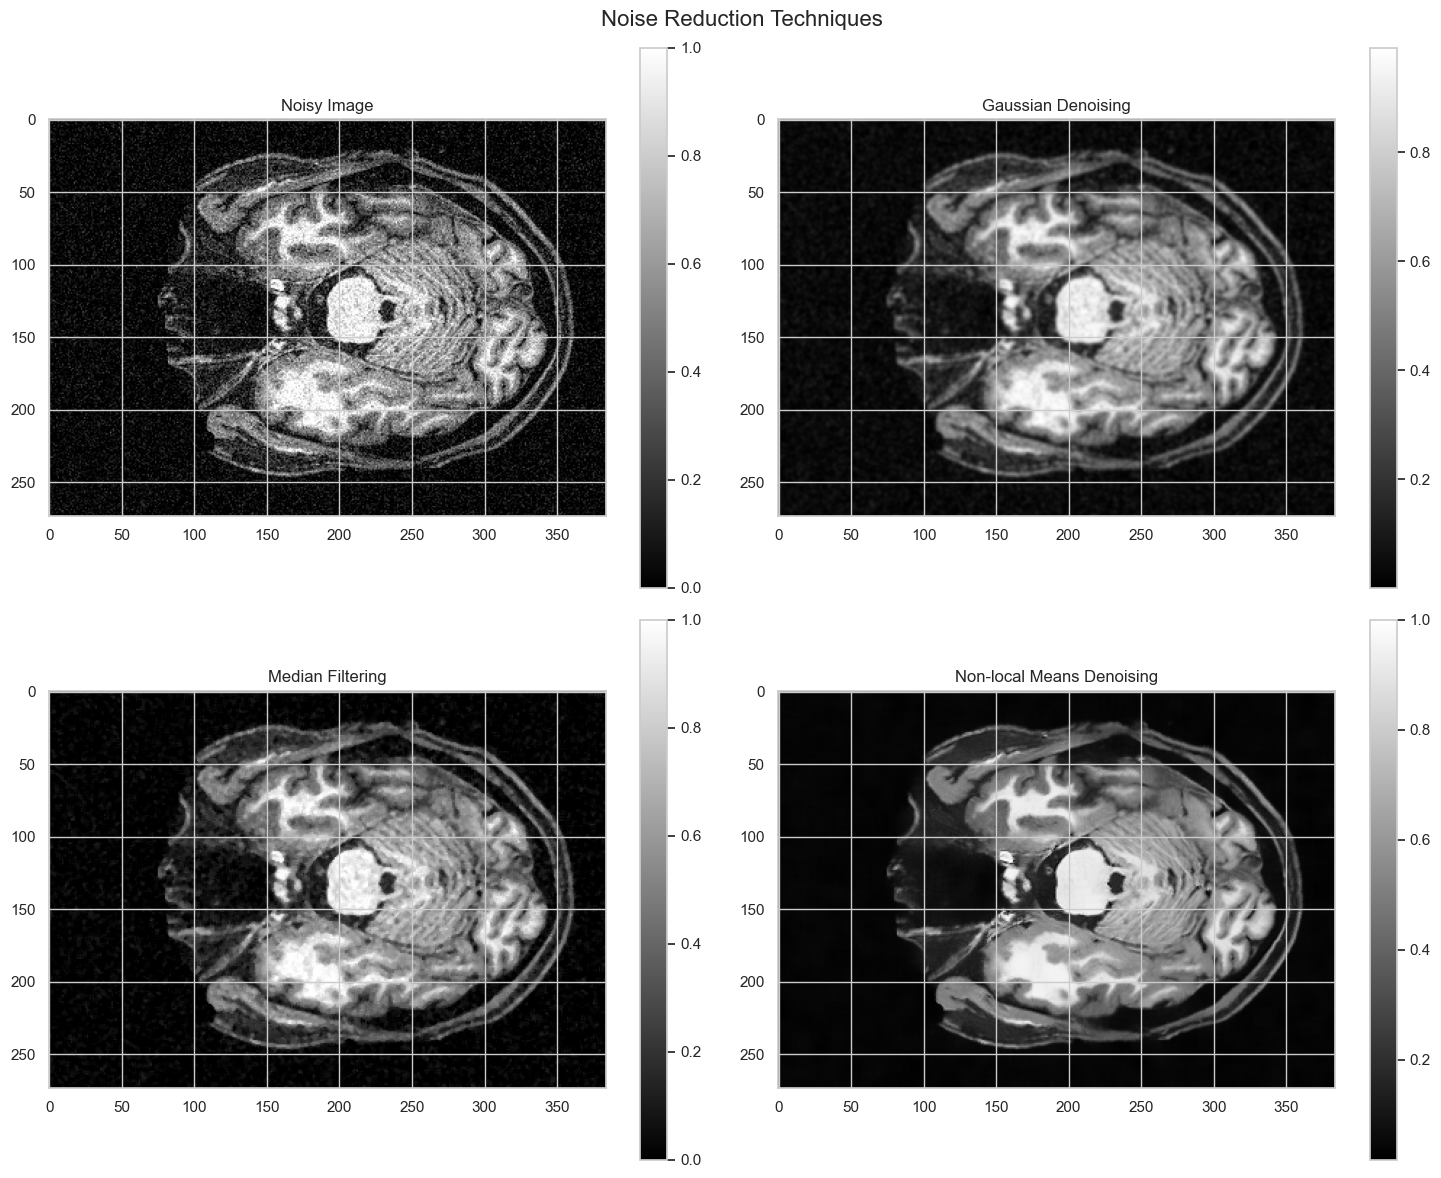


Denoising Quality Metrics (PSNR):
Noisy Image: 21.63 dB
Gaussian Denoising: 24.58 dB
Median Filtering: 25.16 dB
Non-local Means: 25.39 dB


In [3]:
# Use the robustly normalized image for denoising examples
image_to_denoise = normalized_robust.copy()

# Add synthetic noise to better demonstrate denoising
noisy_image = image_to_denoise + np.random.normal(0, 0.1, image_to_denoise.shape)
noisy_image = np.clip(noisy_image, 0, 1)  # Ensure values stay in [0, 1]

# 1. Gaussian smoothing
gaussian_denoised = filters.gaussian(noisy_image, sigma=1)

# 2. Median filtering
median_denoised = filters.median(noisy_image)

# 3. Non-local means denoising
nlm_denoised = restoration.denoise_nl_means(noisy_image, patch_size=5, 
                                          patch_distance=6, h=0.1)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Noise Reduction Techniques', fontsize=16)

# Original noisy image
im1 = axes[0, 0].imshow(noisy_image, cmap='gray')
axes[0, 0].set_title('Noisy Image')
plt.colorbar(im1, ax=axes[0, 0])

# Gaussian denoising
im2 = axes[0, 1].imshow(gaussian_denoised, cmap='gray')
axes[0, 1].set_title('Gaussian Denoising')
plt.colorbar(im2, ax=axes[0, 1])

# Median denoising
im3 = axes[1, 0].imshow(median_denoised, cmap='gray')
axes[1, 0].set_title('Median Filtering')
plt.colorbar(im3, ax=axes[1, 0])

# Non-local means denoising
im4 = axes[1, 1].imshow(nlm_denoised, cmap='gray')
axes[1, 1].set_title('Non-local Means Denoising')
plt.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Calculate and print quality metrics
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

print("\nDenoising Quality Metrics (PSNR):")
print(f"Noisy Image: {calculate_psnr(image_to_denoise, noisy_image):.2f} dB")
print(f"Gaussian Denoising: {calculate_psnr(image_to_denoise, gaussian_denoised):.2f} dB")
print(f"Median Filtering: {calculate_psnr(image_to_denoise, median_denoised):.2f} dB")
print(f"Non-local Means: {calculate_psnr(image_to_denoise, nlm_denoised):.2f} dB")

## 3. Contrast Enhancement

Proper contrast enhancement is crucial in medical imaging for:
- Improving visibility of anatomical structures
- Highlighting subtle tissue differences
- Enhancing feature detection for AI models

Let's explore different contrast enhancement techniques:

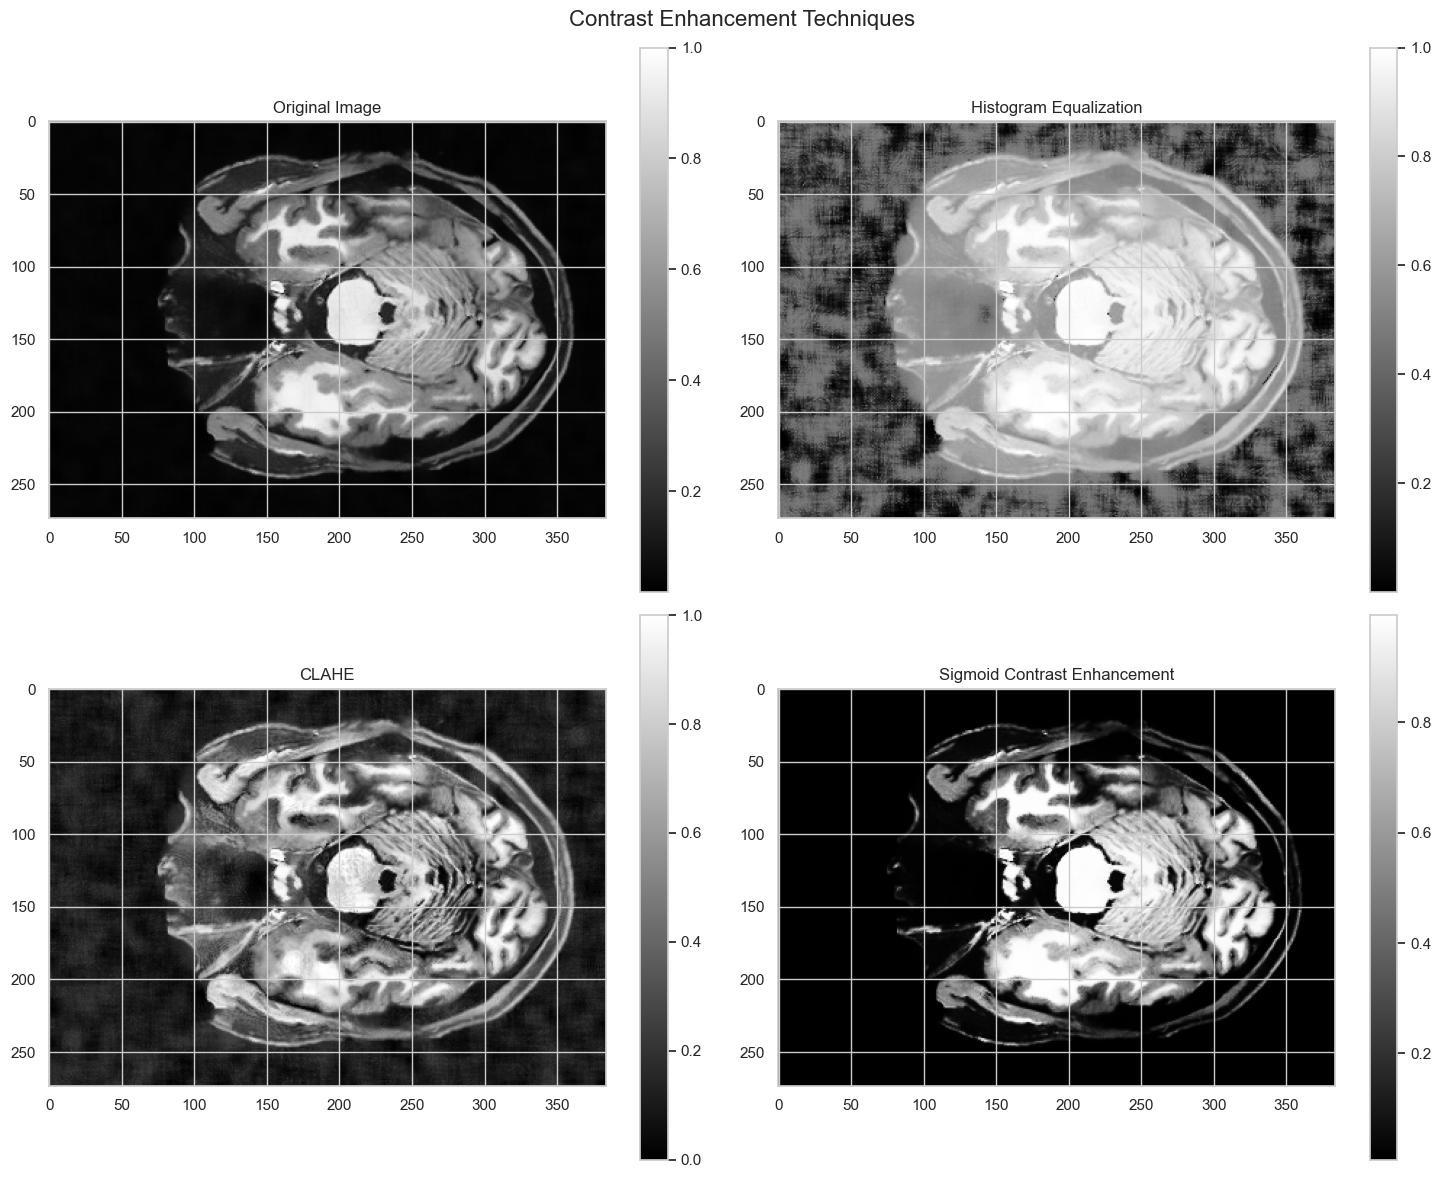

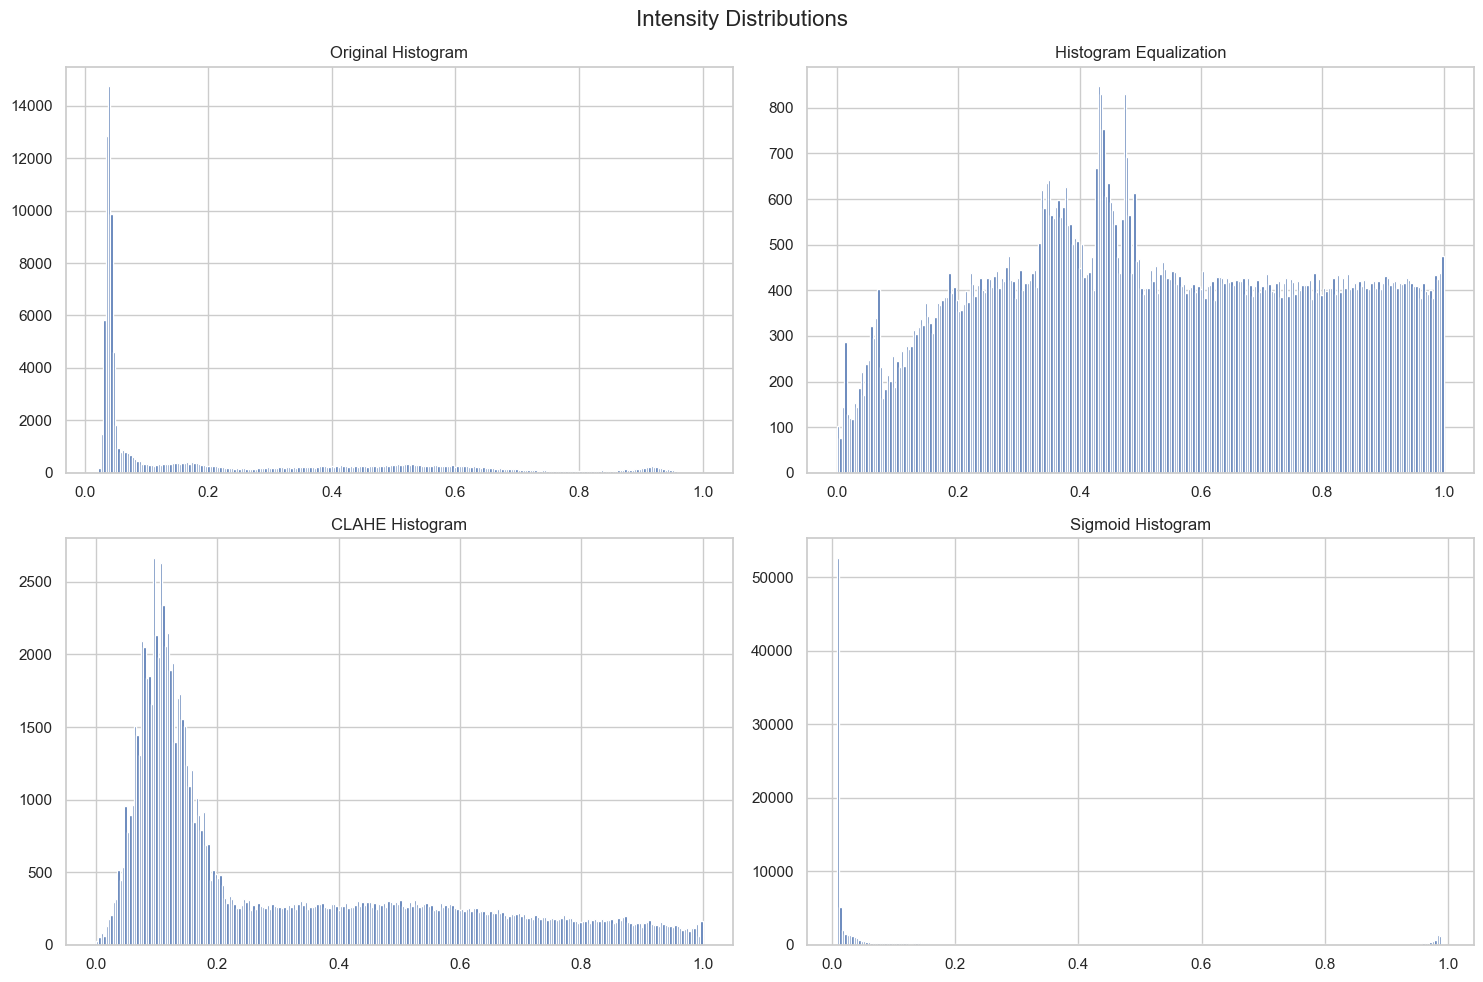


Contrast Metrics (Coefficient of Variation):
Original: 1.145
Histogram Equalization: 0.506
CLAHE: 0.865
Sigmoid: 1.582


In [4]:
# Use the denoised image for contrast enhancement
image_to_enhance = nlm_denoised.copy()

# 1. Histogram Equalization
hist_eq = exposure.equalize_hist(image_to_enhance)

# 2. Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = exposure.equalize_adapthist(image_to_enhance, clip_limit=0.03)

# 3. Sigmoid Contrast Enhancement
sigmoid = exposure.adjust_sigmoid(image_to_enhance, cutoff=0.5, gain=10)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Contrast Enhancement Techniques', fontsize=16)

# Original
im1 = axes[0, 0].imshow(image_to_enhance, cmap='gray')
axes[0, 0].set_title('Original Image')
plt.colorbar(im1, ax=axes[0, 0])

# Histogram Equalization
im2 = axes[0, 1].imshow(hist_eq, cmap='gray')
axes[0, 1].set_title('Histogram Equalization')
plt.colorbar(im2, ax=axes[0, 1])

# CLAHE
im3 = axes[1, 0].imshow(clahe, cmap='gray')
axes[1, 0].set_title('CLAHE')
plt.colorbar(im3, ax=axes[1, 0])

# Sigmoid
im4 = axes[1, 1].imshow(sigmoid, cmap='gray')
axes[1, 1].set_title('Sigmoid Contrast Enhancement')
plt.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Intensity Distributions', fontsize=16)

# Original histogram
axes[0, 0].hist(image_to_enhance.ravel(), bins=256)
axes[0, 0].set_title('Original Histogram')

# Histogram Equalization
axes[0, 1].hist(hist_eq.ravel(), bins=256)
axes[0, 1].set_title('Histogram Equalization')

# CLAHE
axes[1, 0].hist(clahe.ravel(), bins=256)
axes[1, 0].set_title('CLAHE Histogram')

# Sigmoid
axes[1, 1].hist(sigmoid.ravel(), bins=256)
axes[1, 1].set_title('Sigmoid Histogram')

plt.tight_layout()
plt.show()

# Calculate and print contrast metrics
def calculate_contrast_metric(image):
    return np.std(image) / np.mean(image)

print("\nContrast Metrics (Coefficient of Variation):")
print(f"Original: {calculate_contrast_metric(image_to_enhance):.3f}")
print(f"Histogram Equalization: {calculate_contrast_metric(hist_eq):.3f}")
print(f"CLAHE: {calculate_contrast_metric(clahe):.3f}")
print(f"Sigmoid: {calculate_contrast_metric(sigmoid):.3f}")

## Conclusion and Best Practices

Based on our experiments, here are key takeaways for medical image preprocessing:

1. **Intensity Normalization**
   - Robust normalization (1-99 percentile) works best for medical images
   - Z-score normalization is useful when normal distribution is expected
   - Consider the specific requirements of your AI model

2. **Noise Reduction**
   - Non-local means provides excellent detail preservation
   - Gaussian smoothing is faster but may blur fine details
   - Median filtering is good for salt-and-pepper noise

3. **Contrast Enhancement**
   - CLAHE often provides the best results for medical images
   - Histogram equalization can be too aggressive
   - Sigmoid contrast offers more controlled enhancement

4. **General Guidelines**
   - Always validate results visually
   - Use quantitative metrics to compare methods
   - Consider computational efficiency for large datasets
   - Preserve clinically relevant information

Remember: The goal is to enhance important features while preserving diagnostic information! 🎯